# EOmaps Workshop GeoPython 2024
<font size=3>Interactive geo-data analysis with EOmaps and the scientific python infrastructure.</font>

## Getting Started

1. Clone the workshop repository:  
   <font size=5><b>github.com/raphaelquast/EOmaps_GeoPython2024</b></font>

2. Follow instructions in **README** to setup all you need

---

## What's this workshop about?
> We'll have a look how [EOmaps][eomaps] can help you to **speed up** and **simplify** your geographic data analysis workflows!

[eomaps]: https://eomaps.readthedocs.io/en/latest/

# A few general things before we start

## Configuring the IDE

Jupyter Notebooks are nice for presenting but often you will want a proper IDE.
- If you work with **spyder**, **vscode/vscodium** or **pycharm**, make sure to checkout the [FAQ][FAQ] on how to configure your IDE to work with EOmaps!

## GUI frameworks

[EOmaps][eomaps] is built on top of [matplotlib][matplotlib] which supports **several different GUI frameworks**!  

Within Jupyter Notebooks, you can use the following magic commands to select the backend you want to use:
- `%matplotlib qt`  
  **Interactive (popup)** figures with the **Qt** gui framework (requires `Qt` and `qtpy`)  
  (Allows you to use the [CompanionWidget][companion])

- `%matplotlib tk`  
  **Interactive (popup)** figures with the (python-native) **tkinter** framework

- `%matplotlib widget`  
  **Interactive (inline)** figures (requires `ipympl`)  
  (It is possible to use the [CompanionWidget][companion] if you also run `%gui qt` )

- `%matplotlib inline`  
  **Static (inline)** figures  
  (Note that you can always print static inline snapshots irrespective of the backend with `m.snapshot()`)
  
- `%matplotlib agg`  
  Non-GUI framework (useful if you're only interested in exporting images)

- `%matplotlib webagg`  
  Embedd **interactive** figure in html

... and there's even more! For a full list of available backends, check `%matplotlib --list`  
  or have a look at the [matplotlib docs on backends][mpl_backends]

[eomaps]: https://eomaps.readthedocs.io/en/latest/
[matplotlib]: https://matplotlib.org/
[companion]: https://eomaps.readthedocs.io/en/latest/api_companion_widget.html
[mpl_backends]: https://matplotlib.org/stable/users/explain/figure/backends.html
[FAQ]: https://eomaps.readthedocs.io/en/latest/FAQ.html

# Basics

A (very) quick walk through the capabilities of EOmaps

---

To start creating a map, we initialize a new [**`Maps`**][Maps] object.  

The first [**`Maps`**][Maps] object that is created will initialize a [**`matplotlib.Figure`**][figure] and a [**`cartopy.GeoAxes`**][geoaxes] for a map.  
You can then use the returned [**`Maps`**][Maps] instance to add features/callbacks etc. to the associated map.


The basic call-signature is:
```python
m = Maps(crs="the projection of the map", **figure_kwargs)

m.f   # the matplotlib.Figure associated with the Maps object
m.ax  # the cartopy.GeoAxes   associated with the Maps object
```

> The **crs** can be an integer (identified as epsg-code, e.g. 3857) or a [**`cartopy.Projection`**][cartopy_projection].  
> (Available projections are also directly accessible via `Maps.CRS.< NAME >`)


<div class="alert alert-block alert-info"> 

Once your map is ready, you can show it by calling `m.show()`.  
In **Jupyter Notebooks** you can also print a **static snapshot of the current state of the map** to the active cell with `m.snapshot()`

To save the map as *png, jpeg, svg, pdf*  etc. use `m.savefig()`

</div>

[Maps]: https://eomaps.readthedocs.io/en/dev/generated/eomaps.eomaps.Maps.html
[figure]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
[geoaxes]: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html
[cartopy_projection]: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

- If you want to **add** something to a map, use `m.add_...`
- If you want to **set** properties of a map, use `m.set_...`
- If you want to create **new** maps or layers, use `m.new_...`

### Lets create a first map

In [1]:
%matplotlib qt
from eomaps import Maps
Maps.config(always_on_top=True, log_level="info")      # keep Qt figures "always on top"

In [2]:
# Initialize a new map
m = Maps(figsize=(6, 3), facecolor="none")
m.set_frame(rounded=0.15, ec="0.5")

In [3]:
# add some features to the map
m.add_feature.preset.coastline()
m.add_feature.physical.ocean(
    scale=50,
    fc="lightblue",
    ec="darkblue",
    hatch="xxx", 
    alpha=0.25,
)

In [4]:
# add a compass and a logo
m.add_compass(pos=(0.1, 0.25))
m.add_logo()

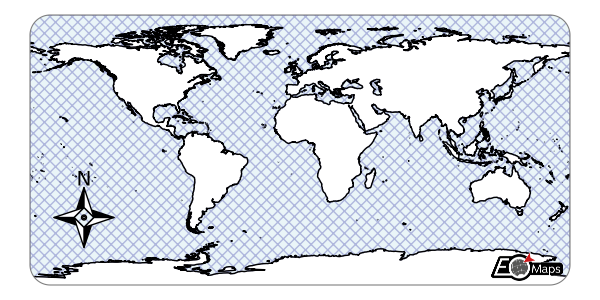

In [5]:
# print a static snapshot of the "current state of the figure" to the notebook
m.snapshot()

## Layer Management

Figures created with EOmaps are **multi-layered**!

The following overview-image explains the basics on how to work with multiple layers:

<a href="https://raw.githubusercontent.com/raphaelquast/EOmaps/master/docs/_static/intro.png"><img src="https://raw.githubusercontent.com/raphaelquast/EOmaps/master/docs/_static/intro.png" width=30%></a>

In [6]:
m = Maps(crs=3857)
m_ocean = m.new_layer("ocean")
m_markers = m.new_layer("markers")
m_overlay = m.new_layer("overlay")

In [7]:
# add features to the "ocean" layer
m_ocean.add_feature.preset.ocean()

In [8]:
# add features to the "markers" layer
m_markers.add_marker(
    xy=([-10, 20, 70], [-10, 20, 70]), xy_crs=4326, 
    shape="ellipses", radius=10, radius_crs=4326, 
    fc=["r", "g", "b"], 
)

In [9]:
# add features to the "overlay" layer
m_overlay.add_feature.preset.coastline(lw=0.25)

m_overlay.add_annotation(
    xy=(7.642, 47.535), xy_crs=4326, xytext=(-60, 50),
    text="GeoPython 2024\n(Basel)", weight="bold", ha="center",
)

Text(-60, 50, 'GeoPython 2024\n(Basel)')

In [10]:
# add features to the "grid" layer by using the "layer" kwarg
gl = m.add_gridlines(25, lw=0.5, c=".5", layer="grid")
gl_2 = m.add_gridlines([7.642, 47.535], lw=2, ls="--", layer="grid")
gl_2.add_labels(where="tr", weight="bold")

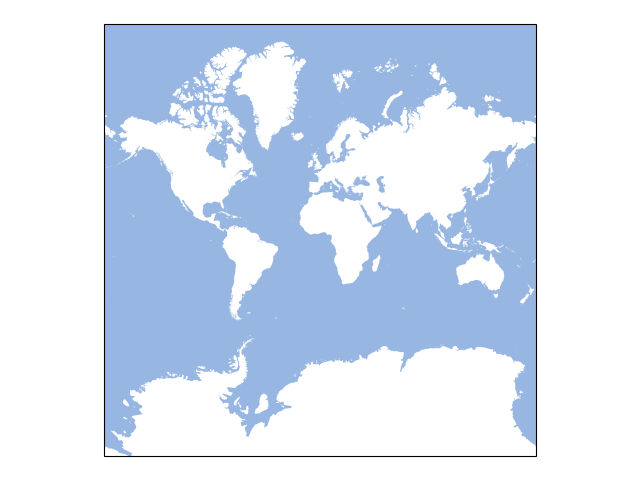

In [11]:
m.show_layer("ocean")
m.snapshot()

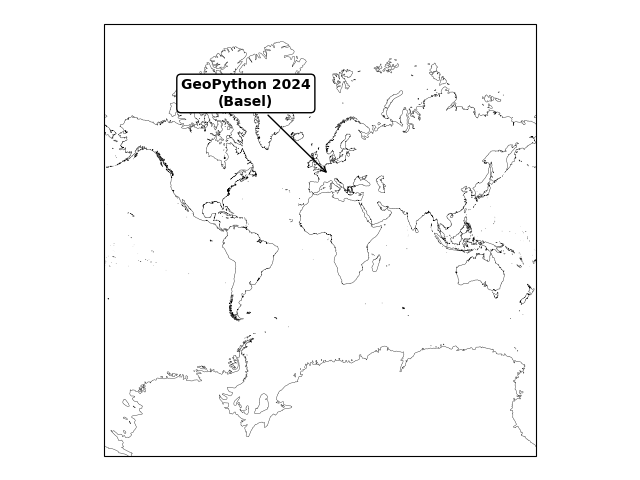

In [12]:
m.show_layer("overlay")
m.snapshot()

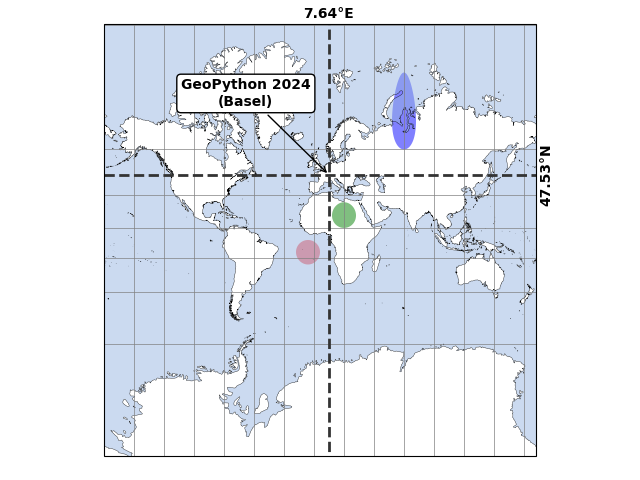

In [13]:
m.show_layer(m.layer, (m_markers.layer, .5), (m_ocean.layer, .5),  m_overlay.layer, "grid")
m.snapshot()

## Companion Widget

<div class="alert alert-block alert-info"> 

To activate, press **W** while mouse is on top of an *active figure* that contains an EOmaps map.

</div>

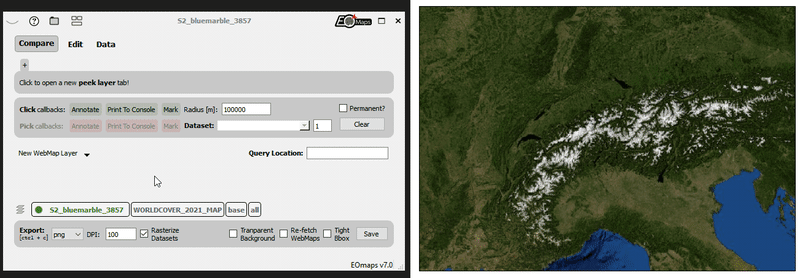
